<a href="https://colab.research.google.com/github/FatihKarabas/AI-WORKS/blob/main/KesifselVeriAnalizi__Promptlar_titanicFirstShot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KeÅŸifsel Veri Analizi - Promptlar

# Ä°LGÄ°LÄ° KÃœTÃœPHANELERÄ° IMPORT ETME (BURADA ADIM ADIM GÄ°DECEÄžÄ°MÄ°ZDEN Ä°HTÄ°YAÃ‡ OLDUÄžU AN IMPORT Ä°ÅžLEMLERÄ° YAPILACAKTIR) VE DOSYAYI OKUMA

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import pandas as pd

# DosyanÄ±n tam yolunu burada belirtmelisin
file_path = "/content/drive/MyDrive/Titanic-Dataset.csv"

# CSV dosyasÄ±nÄ± Pandas ile oku
df = pd.read_csv(file_path)

# VERÄ° SETÄ°NE GENEL BÄ°R BAKIÅž

In [20]:
# Ä°lk 5 satÄ±rÄ± gÃ¶ster
df.head()


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [21]:
# Veri Ã§erÃ§evesinin genel bilgilerini gÃ¶ster
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
# Veri kÃ¼mesinin boyutlarÄ±nÄ± gÃ¶ster
df.shape

(891, 12)

In [23]:
# Veri setinin temel istatistiksel Ã¶zetini gÃ¶ster
df.describe()


PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

# VERÄ° SETÄ°NÄ° YAPISAL OLARAK Ä°NCELEME

In [24]:
# Veri setindeki sÃ¼tunlarÄ±n veri tÃ¼rlerini gÃ¶rÃ¼ntÃ¼leme
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [25]:
# Her sÃ¼tundaki benzersiz deÄŸer sayÄ±sÄ±nÄ± gÃ¶ster
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

Bu Ã§Ä±ktÄ±ya gÃ¶re:
Survived ve Sex sÃ¼tunlarÄ± 2 farklÄ± deÄŸer iÃ§eriyor (muhtemelen 0 ve 1 veya kadÄ±n ve erkek).
Pclass sÃ¼tunu 3 farklÄ± sÄ±nÄ±ftan oluÅŸuyor.
PassengerId ve Name sÃ¼tunlarÄ± her yolcu iÃ§in benzersiz




In [26]:
# Her sÃ¼tunda eksik veri sayÄ±sÄ±nÄ± gÃ¶rÃ¼ntÃ¼leme
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Bu sonuÃ§lara gÃ¶re:

Age sÃ¼tununda 177 eksik deÄŸer var.
Cabin sÃ¼tununda 687 eksik deÄŸer var (bÃ¼yÃ¼k ihtimalle Ã§oÄŸu yolcunun kabin numarasÄ± kaydedilmemiÅŸ).
Embarked sÃ¼tununda 2 eksik deÄŸer var.
Eksik verileri temizleme veya doldurma iÅŸlemleri iÃ§in ilerleyen aÅŸamalarda uygun yÃ¶ntemler kullanÄ±labilir.

In [30]:
# Rastgele 5 satÄ±r seÃ§me
df.sample(5)


PassengerId  Survived  Pclass                           Name     Sex  \
69            70         0       3              Kink, Mr. Vincenz    male   
491          492         0       3            Windelov, Mr. Einar    male   
23            24         1       1   Sloper, Mr. William Thompson    male   
627          628         1       1  Longley, Miss. Gretchen Fiske  female   
828          829         1       3   McCormack, Mr. Thomas Joseph    male   

      Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
69   26.0      2      0            315151   8.6625   NaN        S  
491  21.0      0      0  SOTON/OQ 3101317   7.2500   NaN        S  
23   28.0      0      0            113788  35.5000    A6        S  
627  21.0      0      0             13502  77.9583    D9        S  
828   NaN      0      0            367228   7.7500   NaN        Q

# VERÄ° SETÄ°NDEKÄ° EKSÄ°K DEÄžERLERÄ° GÃ–RÃœNTÃœLEME

In [35]:
# Her sÃ¼tundaki eksik veri sayÄ±sÄ±nÄ± hesapla
missing_values = df.isnull().sum()

# Eksik veri yÃ¼zdesini hesapla
missing_percentage = (missing_values / len(df)) * 100

# Eksik veri sayÄ±sÄ± ve yÃ¼zdelerini tablo halinde gÃ¶ster
missing_data = pd.DataFrame({"Eksik DeÄŸer SayÄ±sÄ±": missing_values, "Eksik Veri (%)": missing_percentage})

# Sadece eksik veri iÃ§eren sÃ¼tunlarÄ± filtrele
missing_data = missing_data[missing_data["Eksik DeÄŸer SayÄ±sÄ±"] > 0]

# Eksik veri miktarlarÄ±nÄ± bÃ¼yÃ¼kten kÃ¼Ã§Ã¼ÄŸe sÄ±rala
missing_data.sort_values(by="Eksik Veri (%)", ascending=False)


Eksik DeÄŸer SayÄ±sÄ±  Eksik Veri (%)
Cabin                    687       77.104377
Age                      177       19.865320
Embarked                   2        0.224467

Bu tabloyu inceleyerek:

Cabin sÃ¼tununun %77â€™sinin eksik olduÄŸunu,
Age sÃ¼tununun yaklaÅŸÄ±k %20â€™sinin eksik olduÄŸunu,
Embarked sÃ¼tununun ise yalnÄ±zca 2 eksik deÄŸere sahip olduÄŸunu gÃ¶rebilirsin.

# VERÄ° SETÄ°NDEKÄ° DEÄžÄ°ÅžKENLER ARASINDAKÄ° Ä°LÄ°ÅžKÄ°LERÄ° Ä°NCELEMEK

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns


# AdÄ±m 10: "Survived" ve "Sex" SÃ¼tunlarÄ±nÄ±n DaÄŸÄ±lÄ±mÄ±nÄ± Bar Plot ile GÃ¶sterme

Bar plot, kategorik deÄŸiÅŸkenlerin daÄŸÄ±lÄ±mÄ±nÄ± gÃ¶rmek iÃ§in idealdir.

<ipython-input-38-7ce60348b6a2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Survived", palette="pastel")


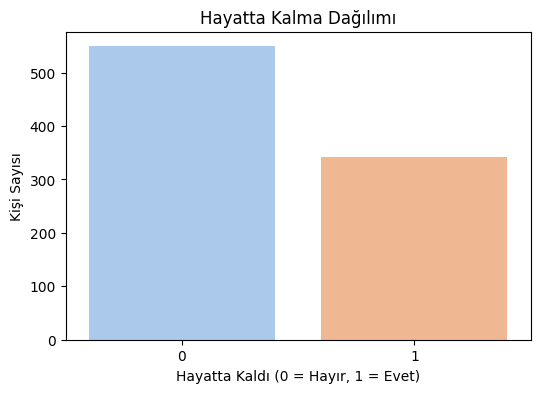

In [38]:
# "Survived" deÄŸiÅŸkeninin daÄŸÄ±lÄ±mÄ±
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Survived", palette="pastel")
plt.title("Hayatta Kalma DaÄŸÄ±lÄ±mÄ±")
plt.xlabel("Hayatta KaldÄ± (0 = HayÄ±r, 1 = Evet)")
plt.ylabel("KiÅŸi SayÄ±sÄ±")
plt.show()

<ipython-input-39-79e016573ee3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Sex", palette="Set2")


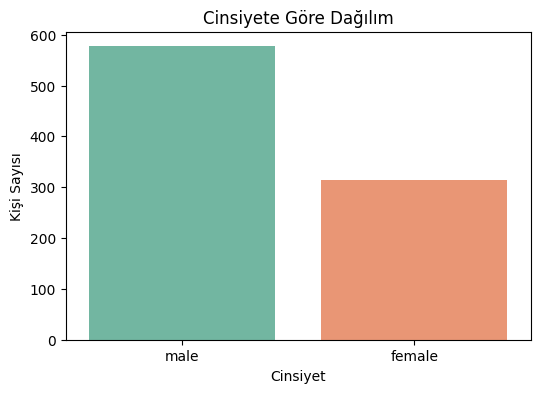

In [39]:
# "Sex" deÄŸiÅŸkeninin daÄŸÄ±lÄ±mÄ±
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Sex", palette="Set2")
plt.title("Cinsiyete GÃ¶re DaÄŸÄ±lÄ±m")
plt.xlabel("Cinsiyet")
plt.ylabel("KiÅŸi SayÄ±sÄ±")
plt.show()

AdÄ±m 11: "Pclass" ve "Embarked" DeÄŸiÅŸkenlerinin DaÄŸÄ±lÄ±mlarÄ±nÄ± Bar Plot ile GÃ¶sterme

<ipython-input-40-4c3066860148>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Pclass", palette="muted")


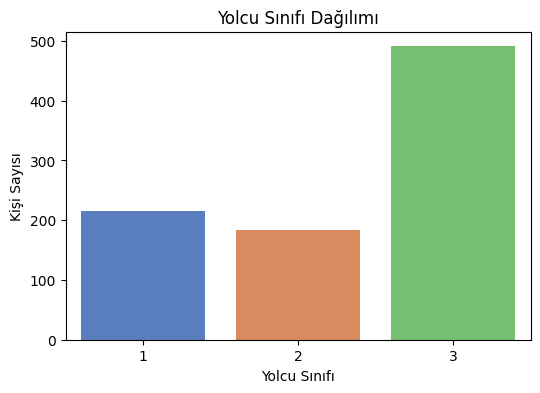

<ipython-input-40-4c3066860148>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Embarked", palette="coolwarm")


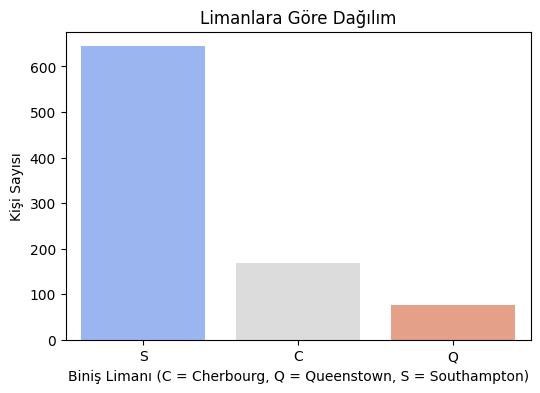

In [40]:
# "Pclass" deÄŸiÅŸkeninin daÄŸÄ±lÄ±mÄ±
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Pclass", palette="muted")
plt.title("Yolcu SÄ±nÄ±fÄ± DaÄŸÄ±lÄ±mÄ±")
plt.xlabel("Yolcu SÄ±nÄ±fÄ±")
plt.ylabel("KiÅŸi SayÄ±sÄ±")
plt.show()

# "Embarked" deÄŸiÅŸkeninin daÄŸÄ±lÄ±mÄ±
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Embarked", palette="coolwarm")
plt.title("Limanlara GÃ¶re DaÄŸÄ±lÄ±m")
plt.xlabel("BiniÅŸ LimanÄ± (C = Cherbourg, Q = Queenstown, S = Southampton)")
plt.ylabel("KiÅŸi SayÄ±sÄ±")
plt.show()


AdÄ±m 12: "SibSp" ve "Parch" DeÄŸiÅŸkenlerinin DaÄŸÄ±lÄ±mlarÄ±nÄ± Bar Plot ile GÃ¶sterme
python
Kopyala
DÃ¼zenle


<ipython-input-41-fe338d58d3b2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="SibSp", palette="rocket")


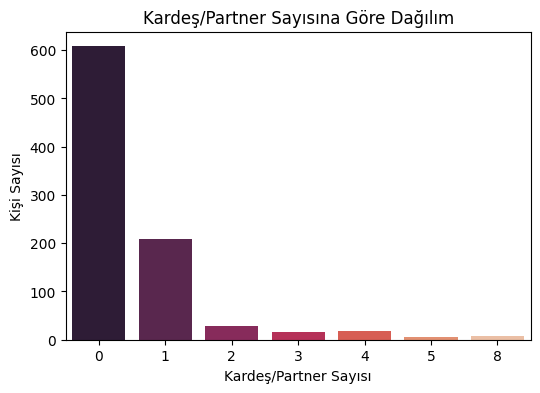

<ipython-input-41-fe338d58d3b2>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Parch", palette="magma")


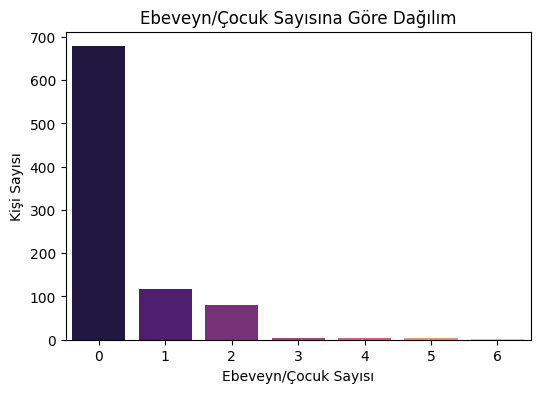

In [41]:
# "SibSp" deÄŸiÅŸkeninin daÄŸÄ±lÄ±mÄ±
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="SibSp", palette="rocket")
plt.title("KardeÅŸ/Partner SayÄ±sÄ±na GÃ¶re DaÄŸÄ±lÄ±m")
plt.xlabel("KardeÅŸ/Partner SayÄ±sÄ±")
plt.ylabel("KiÅŸi SayÄ±sÄ±")
plt.show()

# "Parch" deÄŸiÅŸkeninin daÄŸÄ±lÄ±mÄ±
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Parch", palette="magma")
plt.title("Ebeveyn/Ã‡ocuk SayÄ±sÄ±na GÃ¶re DaÄŸÄ±lÄ±m")
plt.xlabel("Ebeveyn/Ã‡ocuk SayÄ±sÄ±")
plt.ylabel("KiÅŸi SayÄ±sÄ±")
plt.show()


"Fare" ve "Age" DeÄŸiÅŸkenlerinin DaÄŸÄ±lÄ±mlarÄ±nÄ± Histogram ile GÃ¶sterme

Histogram, sÃ¼rekli deÄŸiÅŸkenlerin daÄŸÄ±lÄ±mÄ±nÄ± gÃ¶rselleÅŸtirmek iÃ§in kullanÄ±lÄ±r

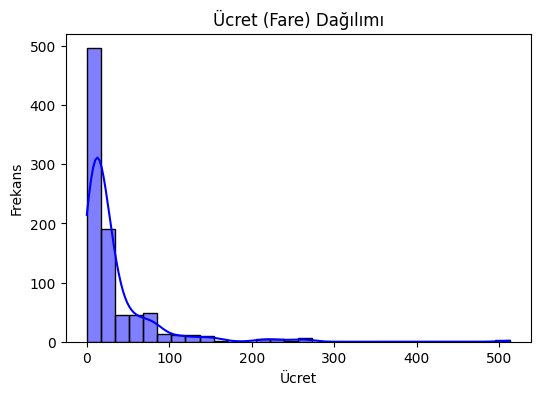

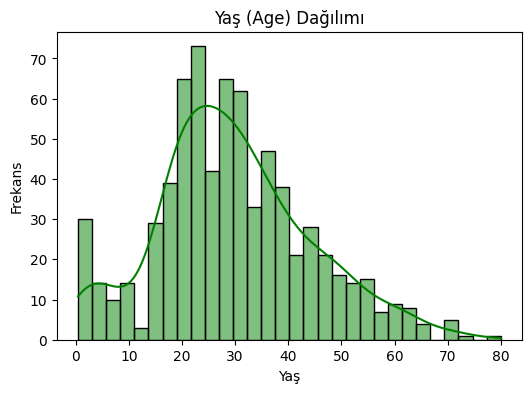

In [42]:
# "Fare" deÄŸiÅŸkeninin daÄŸÄ±lÄ±mÄ±
plt.figure(figsize=(6, 4))
sns.histplot(df["Fare"], bins=30, kde=True, color="blue")
plt.title("Ãœcret (Fare) DaÄŸÄ±lÄ±mÄ±")
plt.xlabel("Ãœcret")
plt.ylabel("Frekans")
plt.show()

# "Age" deÄŸiÅŸkeninin daÄŸÄ±lÄ±mÄ±
plt.figure(figsize=(6, 4))
sns.histplot(df["Age"].dropna(), bins=30, kde=True, color="green")
plt.title("YaÅŸ (Age) DaÄŸÄ±lÄ±mÄ±")
plt.xlabel("YaÅŸ")
plt.ylabel("Frekans")
plt.show()


Ã–zet
Bu adÄ±mlarÄ± tamamladÄ±ktan sonra:

Bar plotlar ile kategorik deÄŸiÅŸkenlerin (Survived, Sex, Pclass, Embarked, SibSp, Parch) daÄŸÄ±lÄ±mlarÄ±nÄ± inceledik.
Histogramlar ile sÃ¼rekli deÄŸiÅŸkenlerin (Fare, Age) daÄŸÄ±lÄ±mlarÄ±nÄ± analiz ettik.

# **AKADEMÄ°K Ã‡ALIÅžMALAR Ä°Ã‡Ä°N DAHA PROFESYONEL GÃ–RSELLER**

AdÄ±m 13: "Age" ve "Survived" SÃ¼tunlarÄ± iÃ§in YoÄŸunluk GrafiÄŸi

Ã–ncelikle, hayatta kalan ve Ã¶len yolcularÄ±n yaÅŸ daÄŸÄ±lÄ±mlarÄ±nÄ± aynÄ± grafik Ã¼zerinde kÄ±yaslayalÄ±m:

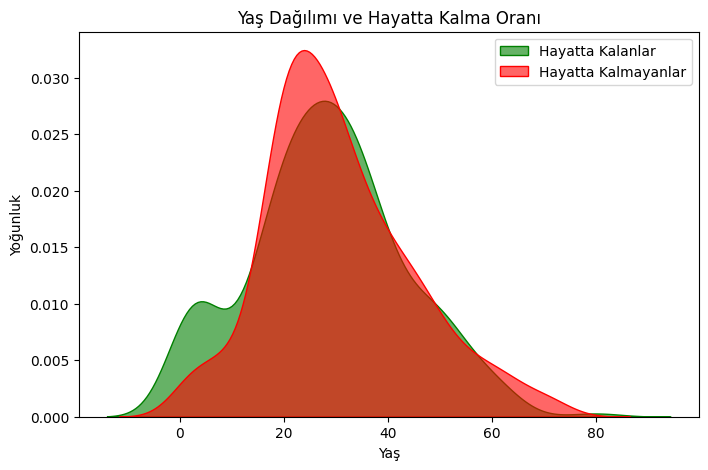

In [43]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df[df["Survived"] == 1]["Age"], fill=True, color="green", label="Hayatta Kalanlar", alpha=0.6)
sns.kdeplot(df[df["Survived"] == 0]["Age"], fill=True, color="red", label="Hayatta Kalmayanlar", alpha=0.6)

plt.title("YaÅŸ DaÄŸÄ±lÄ±mÄ± ve Hayatta Kalma OranÄ±")
plt.xlabel("YaÅŸ")
plt.ylabel("YoÄŸunluk")
plt.legend()
plt.show()


Analiz:  
Bu grafik, farklÄ± yaÅŸ gruplarÄ±nda hayatta kalma oranlarÄ±nÄ± gÃ¶sterir. YeÅŸil alan hayatta kalanlarÄ±, kÄ±rmÄ±zÄ± alan ise hayatÄ±nÄ± kaybedenleri temsil eder. EÄŸer belirli yaÅŸ gruplarÄ±nda belirgin farklÄ±lÄ±klar varsa, bu grafik bunu gÃ¶rselleÅŸtirmeye yardÄ±mcÄ± olur.

AdÄ±m 14: "Pclass" (SÄ±nÄ±f) DeÄŸiÅŸkenine GÃ¶re YaÅŸ ve Hayatta Kalma YoÄŸunluk GrafiÄŸi

FarklÄ± yolcu sÄ±nÄ±flarÄ±na gÃ¶re yaÅŸ daÄŸÄ±lÄ±mÄ± ve hayatta kalma oranlarÄ±nÄ± inceleyelim.

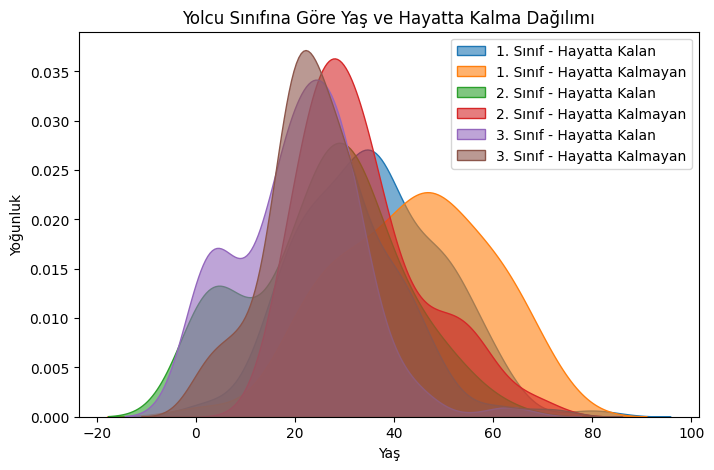

In [44]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df[(df["Survived"] == 1) & (df["Pclass"] == 1)]["Age"], fill=True, label="1. SÄ±nÄ±f - Hayatta Kalan", alpha=0.6)
sns.kdeplot(df[(df["Survived"] == 0) & (df["Pclass"] == 1)]["Age"], fill=True, label="1. SÄ±nÄ±f - Hayatta Kalmayan", alpha=0.6)

sns.kdeplot(df[(df["Survived"] == 1) & (df["Pclass"] == 2)]["Age"], fill=True, label="2. SÄ±nÄ±f - Hayatta Kalan", alpha=0.6)
sns.kdeplot(df[(df["Survived"] == 0) & (df["Pclass"] == 2)]["Age"], fill=True, label="2. SÄ±nÄ±f - Hayatta Kalmayan", alpha=0.6)

sns.kdeplot(df[(df["Survived"] == 1) & (df["Pclass"] == 3)]["Age"], fill=True, label="3. SÄ±nÄ±f - Hayatta Kalan", alpha=0.6)
sns.kdeplot(df[(df["Survived"] == 0) & (df["Pclass"] == 3)]["Age"], fill=True, label="3. SÄ±nÄ±f - Hayatta Kalmayan", alpha=0.6)

plt.title("Yolcu SÄ±nÄ±fÄ±na GÃ¶re YaÅŸ ve Hayatta Kalma DaÄŸÄ±lÄ±mÄ±")
plt.xlabel("YaÅŸ")
plt.ylabel("YoÄŸunluk")
plt.legend()
plt.show()


Analiz:   
Bu grafik, farklÄ± sÄ±nÄ±flardaki yolcularÄ±n yaÅŸ daÄŸÄ±lÄ±mlarÄ±nÄ± ve hayatta kalma oranlarÄ±nÄ± gÃ¶sterir. EÄŸer belirli bir sÄ±nÄ±fta hayatta kalma oranÄ± daha yÃ¼ksekse, bu yoÄŸunluk farkÄ± olarak kendini gÃ¶sterecektir.

AdÄ±m 15: Pclass'a GÃ¶re "Survived" ve "Age" YoÄŸunluk GrafiÄŸi

Her yolcu sÄ±nÄ±fÄ± iÃ§in yaÅŸ daÄŸÄ±lÄ±mlarÄ±nÄ± tek bir grafik Ã¼zerinde karÅŸÄ±laÅŸtÄ±ralÄ±m:

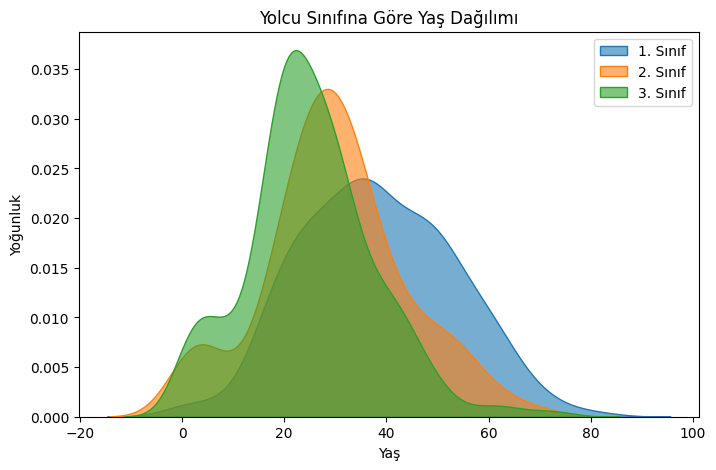

In [45]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df[df["Pclass"] == 1]["Age"], fill=True, label="1. SÄ±nÄ±f", alpha=0.6)
sns.kdeplot(df[df["Pclass"] == 2]["Age"], fill=True, label="2. SÄ±nÄ±f", alpha=0.6)
sns.kdeplot(df[df["Pclass"] == 3]["Age"], fill=True, label="3. SÄ±nÄ±f", alpha=0.6)

plt.title("Yolcu SÄ±nÄ±fÄ±na GÃ¶re YaÅŸ DaÄŸÄ±lÄ±mÄ±")
plt.xlabel("YaÅŸ")
plt.ylabel("YoÄŸunluk")
plt.legend()
plt.show()


Analiz:  
Bu grafik, farklÄ± sÄ±nÄ±ftaki yolcularÄ±n yaÅŸ daÄŸÄ±lÄ±mÄ±nÄ± gÃ¶stermektedir. Ã–zellikle 1. sÄ±nÄ±ftaki yolcularÄ±n daha yaÅŸlÄ±, 3. sÄ±nÄ±ftaki yolcularÄ±n ise daha genÃ§ olduÄŸunu gÃ¶zlemleyebilirsin.

SonuÃ§:  
Bu yoÄŸunluk grafikleri, Titanic'teki hayatta kalma oranlarÄ± ile yaÅŸ ve yolcu sÄ±nÄ±fÄ± arasÄ±ndaki iliÅŸkileri daha net bir ÅŸekilde ortaya koyar. Ã–zellikle 1. sÄ±nÄ±fta hayatta kalma oranÄ±nÄ±n daha yÃ¼ksek olduÄŸunu ve genÃ§ yolcularÄ±n genel olarak hayatta kalma ÅŸanslarÄ±nÄ±n daha fazla olduÄŸunu gÃ¶rebilirsin.

# **KORELASYON ANALÄ°ZÄ°**

Korelasyon Analizi ve IsÄ± HaritasÄ± GÃ¶rselleÅŸtirme

Titanic veri setindeki sayÄ±sal deÄŸiÅŸkenler arasÄ±ndaki korelasyonu analiz etmek iÃ§in aÅŸaÄŸÄ±daki adÄ±mlarÄ± uygulayabilirsin.

AdÄ±m 16: Korelasyon Matrisi ve IsÄ± HaritasÄ±
Ã–ncelikle korelasyon matrisini hesaplayalÄ±m ve seaborn kÃ¼tÃ¼phanesi ile bir heatmap (Ä±sÄ± haritasÄ±) oluÅŸturalÄ±m.

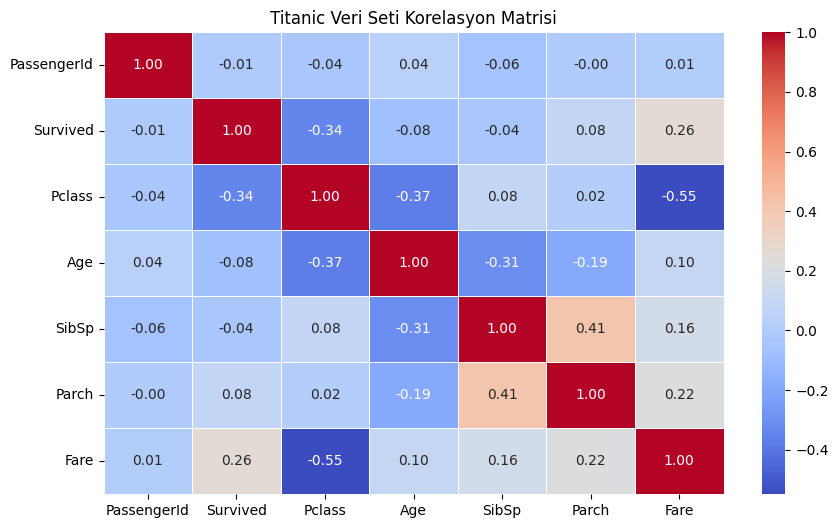

In [46]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasyon matrisini oluÅŸtur
corr_matrix = df.corr(numeric_only=True)

# IsÄ± haritasÄ±nÄ± Ã§iz
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Grafik baÅŸlÄ±ÄŸÄ±nÄ± ekleyelim
plt.title("Titanic Veri Seti Korelasyon Matrisi")
plt.show()


Analiz
Bu Ä±sÄ± haritasÄ± sayesinde:

âœ… "Survived" (Hayatta Kalma) deÄŸiÅŸkeni ile en gÃ¼Ã§lÃ¼ iliÅŸkili deÄŸiÅŸkenleri belirleyebilirsin.

âœ… "Fare" ve "Pclass" deÄŸiÅŸkenleri arasÄ±ndaki negatif korelasyonu gÃ¶rebilirsin (yÃ¼ksek Ã¼cret, dÃ¼ÅŸÃ¼k sÄ±nÄ±f numarasÄ± ile iliÅŸkilidir).

âœ… "SibSp" ve "Parch" deÄŸiÅŸkenlerinin korelasyonu, aile bireyleriyle seyahat edenler iÃ§in bilgi saÄŸlayabilir.

EÄŸer korelasyonu daha sade bir ÅŸekilde incelemek istersen, belirli bir deÄŸiÅŸkenle olan korelasyonlarÄ± sÄ±ralayarak en gÃ¼Ã§lÃ¼ iliÅŸkileri gÃ¶rebilirsin:

In [47]:
# "Survived" sÃ¼tunu ile diÄŸer deÄŸiÅŸkenler arasÄ±ndaki korelasyonu bÃ¼yÃ¼kten kÃ¼Ã§Ã¼ÄŸe sÄ±ralayalÄ±m
corr_with_survived = corr_matrix["Survived"].sort_values(ascending=False)
print(corr_with_survived)


Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64


Bu Ã§Ä±ktÄ±, hayatta kalma durumuyla en gÃ¼Ã§lÃ¼ iliÅŸkili deÄŸiÅŸkenleri gÃ¶sterir.

# Kategorik Veri Analizi ve **GÃ¶rselleÅŸtirme**

# AdÄ±m 17: Kategorik DeÄŸiÅŸkenlerin SÄ±klÄ±k Analizi (value_counts)

Kategorik deÄŸiÅŸkenlerin daÄŸÄ±lÄ±mÄ±nÄ± incelemek iÃ§in value_counts() fonksiyonunu kullanabiliriz. Ã–ncelikle Titanic veri setindeki kategorik deÄŸiÅŸkenleri belirleyelim ve her bir deÄŸiÅŸkenin kaÃ§ kez tekrarlandÄ±ÄŸÄ±nÄ± hesaplayalÄ±m

In [50]:
# Kategorik deÄŸiÅŸkenlerin listesi (object ve kategori tipindekiler)
categorical_columns = df.select_dtypes(include=["object", "category"]).columns

# Her bir kategorik deÄŸiÅŸkenin deÄŸer sayÄ±sÄ±nÄ± yazdÄ±r
for col in categorical_columns:
    print(f"\n{col} sÃ¼tununun deÄŸer sayÄ±mlarÄ±:")
    print(df[col].value_counts())



Name sÃ¼tununun deÄŸer sayÄ±mlarÄ±:
Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: count, Length: 891, dtype: int64

Sex sÃ¼tununun deÄŸer sayÄ±mlarÄ±:
Sex
male      577
female    314
Name: count, dtype: int64

Ticket sÃ¼tununun deÄŸer sayÄ±mlarÄ±:
Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            

âœ… Ã–nerilen GÃ¶rselleÅŸtirme YÃ¶ntemi:  
Bar grafikleri, kategorik deÄŸiÅŸkenlerin sÄ±klÄ±ÄŸÄ±nÄ± gÃ¶stermek iÃ§in idealdir. AÅŸaÄŸÄ±daki kod ile bir sÃ¼tun grafiÄŸi oluÅŸturabilirsin:

<ipython-input-51-febac0e25c0c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Embarked"], palette="Set2")


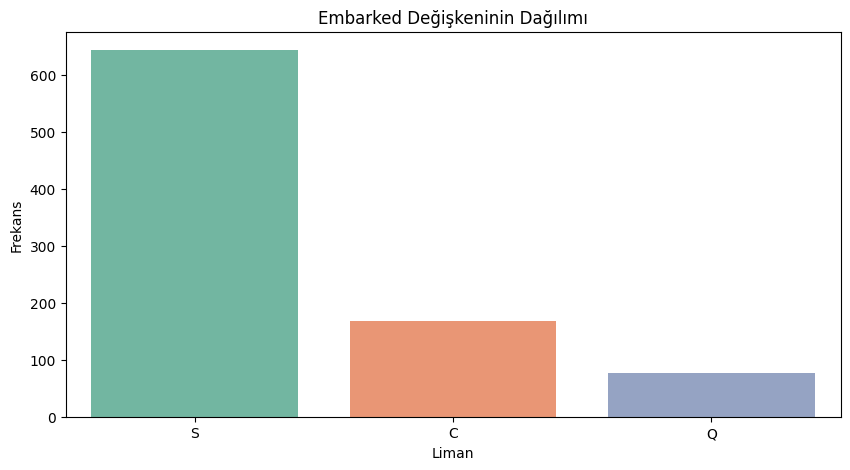

In [51]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df["Embarked"], palette="Set2")
plt.title("Embarked DeÄŸiÅŸkeninin DaÄŸÄ±lÄ±mÄ±")
plt.xlabel("Liman")
plt.ylabel("Frekans")
plt.show()


# AdÄ±m 18: Ä°ki Kategorik DeÄŸiÅŸken ArasÄ±ndaki Ä°liÅŸki (pd.crosstab)

Ä°ki kategorik deÄŸiÅŸken arasÄ±ndaki iliÅŸkiyi incelemek iÃ§in pd.crosstab() fonksiyonunu kullanabiliriz.

Ã–rneÄŸin, cinsiyet ("Sex") ve hayatta kalma durumu ("Survived") arasÄ±ndaki iliÅŸkiyi inceleyelim

In [52]:
# Cinsiyet ve Hayatta Kalma arasÄ±ndaki iliÅŸki
crosstab_result = pd.crosstab(df["Sex"], df["Survived"])
print(crosstab_result)


Survived    0    1
Sex               
female     81  233
male      468  109


âœ… Ã–nerilen GÃ¶rselleÅŸtirme YÃ¶ntemi:  
Bir istikrarlÄ± karÅŸÄ±laÅŸtÄ±rma iÃ§in yÃ¼zde bazlÄ± bar grafiÄŸi kullanÄ±labilir:

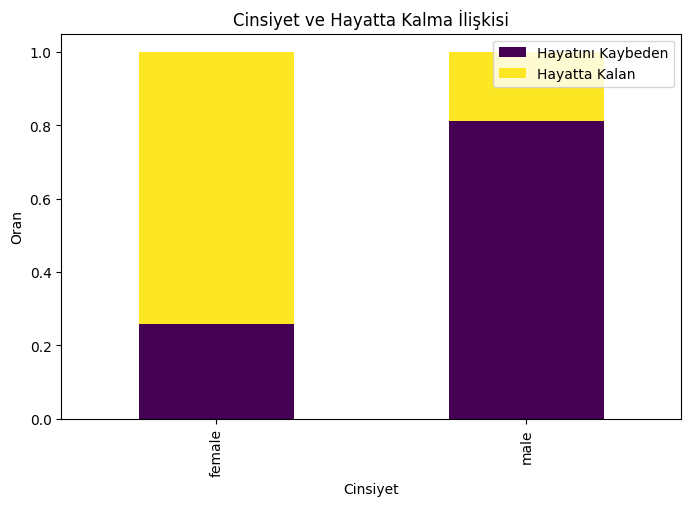

In [53]:
crosstab_result_norm = crosstab_result.div(crosstab_result.sum(1), axis=0)  # YÃ¼zdelik dÃ¶nÃ¼ÅŸÃ¼m

crosstab_result_norm.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="viridis")
plt.title("Cinsiyet ve Hayatta Kalma Ä°liÅŸkisi")
plt.xlabel("Cinsiyet")
plt.ylabel("Oran")
plt.legend(["HayatÄ±nÄ± Kaybeden", "Hayatta Kalan"])
plt.show()


Bu grafik, cinsiyetin hayatta kalma oranÄ± Ã¼zerindeki etkisini yÃ¼zdelik olarak gÃ¶sterir.

# AdÄ±m 19: Kategorik DeÄŸiÅŸkenlerin GÃ¶rselleÅŸtirilmesi (sns.countplot, sns.barplot)

Kategorik deÄŸiÅŸkenlerin daÄŸÄ±lÄ±mÄ±nÄ± analiz etmek iÃ§in sns.countplot() fonksiyonu oldukÃ§a etkilidir.   
Ã–rneÄŸin, Pclass (Bilet SÄ±nÄ±fÄ±) ve Survived deÄŸiÅŸkenlerini inceleyelim:

<ipython-input-54-cb66f04cd870>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Pclass", data=df, palette="coolwarm")


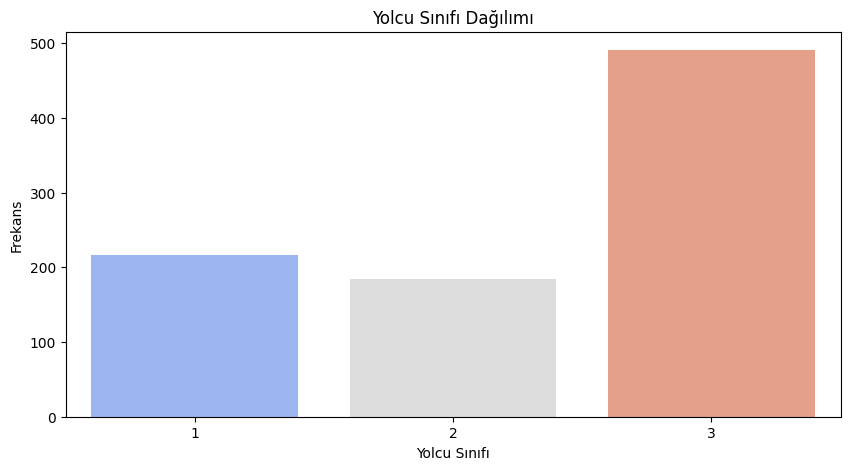

In [54]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Pclass", data=df, palette="coolwarm")
plt.title("Yolcu SÄ±nÄ±fÄ± DaÄŸÄ±lÄ±mÄ±")
plt.xlabel("Yolcu SÄ±nÄ±fÄ±")
plt.ylabel("Frekans")
plt.show()


Bar Plot KullanÄ±mÄ±:      
EÄŸer ortalamalarÄ± kÄ±yaslamak istersen sns.barplot() kullanÄ±labilir.   
Ã–rneÄŸin, sÄ±nÄ±f bazÄ±nda hayatta kalma oranlarÄ±nÄ± inceleyelim:

<ipython-input-55-8626a451df04>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Pclass", y="Survived", data=df, palette="Blues")


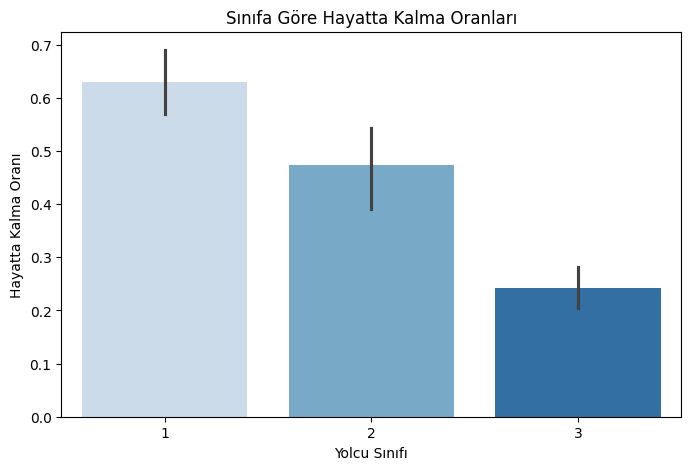

In [55]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Pclass", y="Survived", data=df, palette="Blues")
plt.title("SÄ±nÄ±fa GÃ¶re Hayatta Kalma OranlarÄ±")
plt.xlabel("Yolcu SÄ±nÄ±fÄ±")
plt.ylabel("Hayatta Kalma OranÄ±")
plt.show()

# AdÄ±m 20: SayÄ±sal DeÄŸiÅŸkenler ArasÄ±ndaki Ä°liÅŸkileri Ä°nceleme (scatter_matrix, pairplot)
Birden fazla sayÄ±sal deÄŸiÅŸken arasÄ±ndaki iliÅŸkileri gÃ¶rselleÅŸtirmek iÃ§in pairplot veya scatter_matrix kullanabiliriz.

pairplot() KullanÄ±mÄ±:  
Bu fonksiyon, tÃ¼m sayÄ±sal deÄŸiÅŸkenlerin birbirine gÃ¶re daÄŸÄ±lÄ±mÄ±nÄ± iÃ§eren grafikler oluÅŸturur.

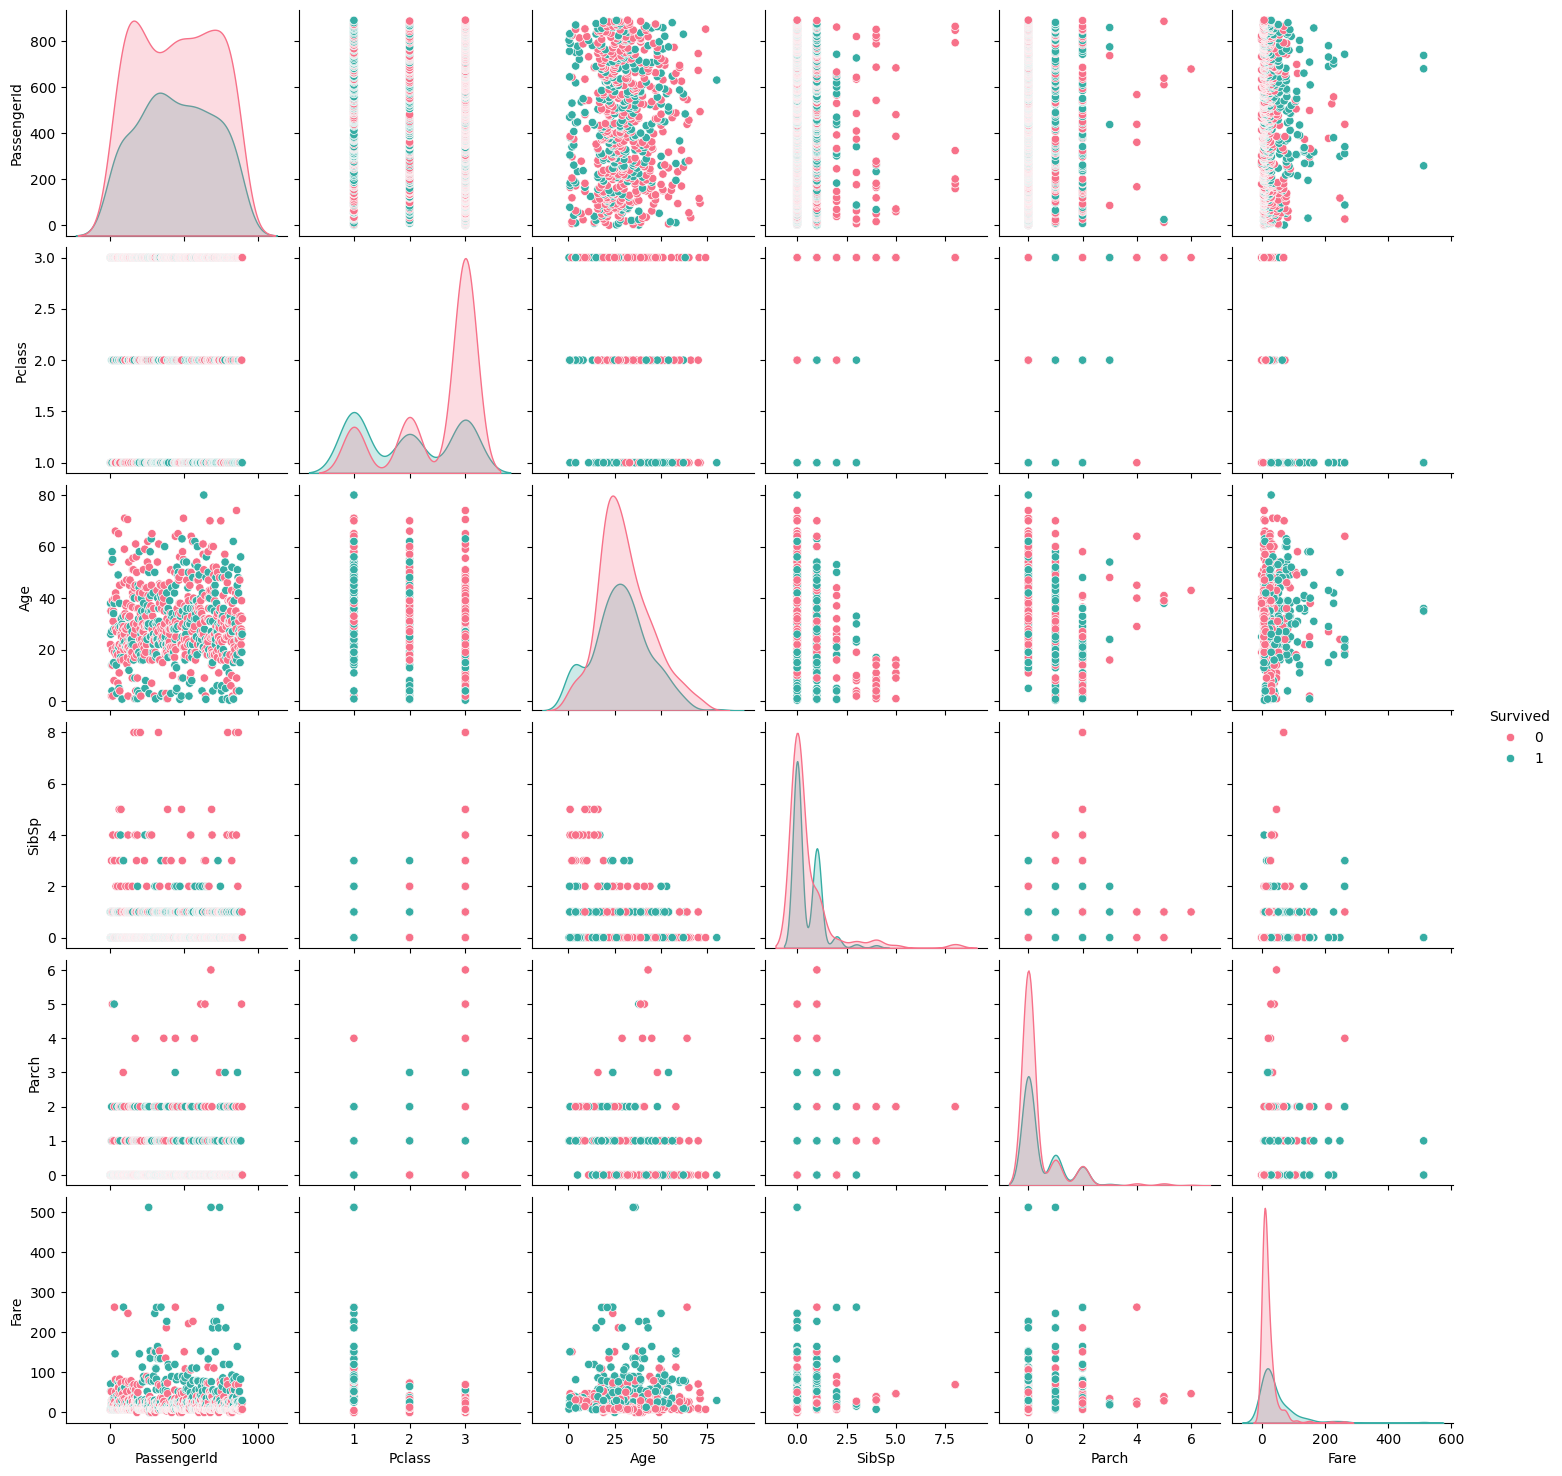

In [56]:
import seaborn as sns

sns.pairplot(df, hue="Survived", diag_kind="kde", palette="husl")
plt.show()

scatter_matrix() KullanÄ±mÄ±:  
scatter_matrix() fonksiyonu da benzer bir iÅŸlev gÃ¶rÃ¼r:

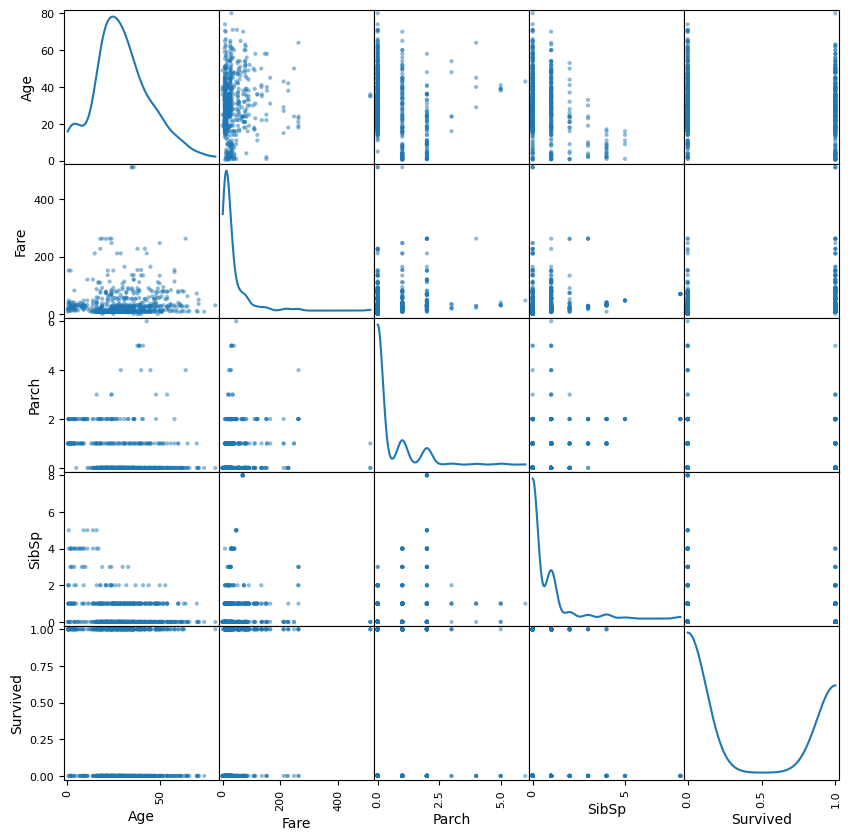

In [57]:
from pandas.plotting import scatter_matrix

scatter_matrix(df[["Age", "Fare", "Parch", "SibSp", "Survived"]], figsize=(10, 10), diagonal="kde")
plt.show()


âœ… Hangi YÃ¶ntemi SeÃ§meliyim?

EÄŸer veriyi genel olarak anlamak istiyorsan: scatter_matrix()
Daha ayrÄ±ntÄ±lÄ± bir analiz ve kategorik renk kodlamasÄ± istiyorsan: pairplot(hue="Survived") daha faydalÄ± olur.

Genel SonuÃ§:  
âœ” Kategorik deÄŸiÅŸkenleri analiz etmek iÃ§in value_counts() ve countplot() kullanÄ±lÄ±r.

âœ” Ä°ki kategorik deÄŸiÅŸkenin iliÅŸkisini incelemek iÃ§in pd.crosstab() ve bar plot Ã¶nerilir.

âœ” SayÄ±sal deÄŸiÅŸkenler arasÄ±ndaki iliÅŸkileri anlamak iÃ§in scatter_matrix() veya pairplot() tercih edilir.

# **EKSTRA**

# Titanic Veri Seti Ä°Ã§in Otomatik EDA Raporu (pandas-profiling ile)
Otomatik olarak KeÅŸifsel Veri Analizi (EDA) raporu oluÅŸturmak iÃ§in pandas-profiling kÃ¼tÃ¼phanesini kullanabilirsin. Bu rapor, veri setindeki eksik verileri, daÄŸÄ±lÄ±mlarÄ±, korelasyonlarÄ± ve aykÄ±rÄ± deÄŸerleri gÃ¶rselleÅŸtirerek analiz sÃ¼recini hÄ±zlandÄ±rÄ±r.

AdÄ±m 1: Gerekli KÃ¼tÃ¼phaneleri YÃ¼kleyin
Ã–ncelikle pandas-profiling kÃ¼tÃ¼phanesinin yÃ¼klÃ¼ olup olmadÄ±ÄŸÄ±nÄ± kontrol edin.

EÄŸer yÃ¼klÃ¼ deÄŸilse, ÅŸu komutu Ã§alÄ±ÅŸtÄ±rarak yÃ¼kleyebilirsiniz:

In [ ]:
!pip install pandas-profiling


Alternatif olarak, Google Colab kullanÄ±yorsanÄ±z yeni sÃ¼rÃ¼mÃ¼nÃ¼ yÃ¼klemek iÃ§in ÅŸu komutu kullanabilirsiniz:


In [59]:
!pip install -U pandas-profiling


# ðŸ“Œ AdÄ±m 2: Profil Raporunu OluÅŸturun
Titanic veri seti iÃ§in pandas-profiling ile detaylÄ± bir analiz raporu oluÅŸturun:

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport

# Titanic veri setini yÃ¼kleyelim
df = pd.read_csv("/content/drive/MyDrive/Titanic-Dataset.csv")

# Profil raporunu oluÅŸtur
profile = ProfileReport(df, title="Titanic Veri Seti KeÅŸifsel Veri Analizi", explorative=True)

# Raporu gÃ¶rÃ¼ntÃ¼le
profile.to_notebook_iframe()


AttributeError: module 'numba' has no attribute 'generated_jit'